<a href="https://colab.research.google.com/github/wlghksx/Dacon_Practice/blob/main/Fashion_MNIST_%EC%9D%98%EB%A5%98_%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 살펴보기

In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train = pd.read_csv('/content/drive/MyDrive/data/train.csv', index_col = 'index')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv', index_col = 'index')
submission = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv',index_col = 'index')


In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [10]:
submission.head()

,label
index,
0,0
1,0
2,0
3,0
4,0


##3. 데이터 시각화

###하나의 데이터를 시각화해봅니다.

###아래 코드의 '81'이라는 숫자는 81번째 행을 의미하며, 동시에 81번째 데이터를 의미합니다.

###다른 이미지를 보고 싶으시면, 81 자리에 다른 숫자를 넣으면 됩니다.

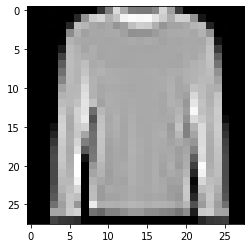

In [14]:
img = np.array(train.iloc[81,1:],dtype = 'float32').reshape((28,28))

plt.imshow(img,cmap = 'gray')
plt.show()

##4. pixel1~pixel784의 의미

###데이터의 한 행은 index, label, 그리고 pixel1 ~ pixel784로 구성됩니다.

###의류 이미지는 가로28 × 세로28 = 총 784 개의 pixel로 구성되며,

###pixel1 ~ pixel784가 각 pixel값을 저장합니다.

#데이터 분석하기 - CNN

##1. 필요한 라이브러리를 준비합니다

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

##2. 데이터를 불러옵니다.

In [53]:
train_df = train
test_df = test

##3. 데이터를 전처리합니다

###이미지 분석에는 'Convolutional Neural Network', CNN이 주로 사용됩니다.

###CNN을 사용하려면 먼저 데이터를 알맞게 가공해야 합니다. 요리 전에 재료를 손질하는 과정과 비슷합니다.

In [54]:
train_data = np.array(train_df.iloc[:,:], dtype = 'float32')
test_data = np.array(test_df.iloc[:,:], dtype='float32')

In [55]:
x_train = train_data[:,1:]/255   # 픽셀값들을 전부 0~1사이의 값으로 만들어주기 위해서 /255
y_train = train_data[:,0]        # 0번째 인덱스에 있는 label값을 y_train으로 지정
x_test= test_data/255           # test_data에는 label값이 없기 때문에, 255로만 나눠줌

In [56]:
x_train.shape

(60000, 784)

In [57]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)
# x,y의 train data를 validation set을 사용하기 위해 0.2/0.8로 나눠줌

In [58]:
x_train.shape

(48000, 784)

In [59]:
x_test.shape

(10000, 784)

In [60]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_validate = x_validate.reshape(x_validate.shape[0],28,28,1)

##4. CNN 모델을 구축합니다.

In [64]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

- 32는 필터의 개수
- kernel_size = 3 은 필터의 크기가 3*3이라는 것이다.
- 활성화 함수는 relu를 사용하였고,
- input 이미지의 shape은 28*28*1임을 보여준다
- MaxPooling2D(pool_size = 2) 풀링필터사이즈2*2 를 사용

- 마지막에는 Flatten을 거친 이후에

- 2개의 fully connected 층을 추가하여 relu 함수와 softmax 함수를 사용하였다.


In [65]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##5. 구축한 모델을 학습합니다.

In [66]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=20,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/20
94/94 [==============================] - 34s 192ms/step - loss: 1.3041 - accuracy: 0.5312 - val_loss: 0.5069 - val_accuracy: 0.8158
Epoch 2/20
94/94 [==============================] - 18s 187ms/step - loss: 0.4757 - accuracy: 0.8346 - val_loss: 0.4183 - val_accuracy: 0.8516
Epoch 3/20
94/94 [==============================] - 18s 188ms/step - loss: 0.4134 - accuracy: 0.8539 - val_loss: 0.3959 - val_accuracy: 0.8579
Epoch 4/20
94/94 [==============================] - 18s 189ms/step - loss: 0.3722 - accuracy: 0.8688 - val_loss: 0.3694 - val_accuracy: 0.8692
Epoch 5/20
94/94 [==============================] - 18s 190ms/step - loss: 0.3510 - accuracy: 0.8756 - val_loss: 0.3509 - val_accuracy: 0.8780
Epoch 6/20
94/94 [==============================] - 18s 190ms/step - loss: 0.3364 - accuracy: 0.8817 - val_loss: 0.3328 - val_accuracy: 0.8826
Epoch 7/20
94/94 [==============================] - 18s 191ms/step - loss: 0.3225 - accuracy: 0.8883 - val_loss: 0.3224 - val_accuracy: 0.8871

##6. 학습한 모델로 test 데이터의 범주(클래스)를 예측합니다.

In [67]:
y_pred = cnn_model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


##7. 예측값을 sample_submission 양식에 맞게 저장합니다.

In [74]:
submission = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv', encoding = 'utf-8')
submission['label'] = y_pred
submission.to_csv('/content/drive/MyDrive/data/fashion_submission.csv', index = False)